# <p style="font-family: Fantasy, fantasy; line-height: 3.3; font-size: 40px; letter-spacing: 5px; text-align: center; color: #4d4dff">Detecting FRAUD transactions of ETHEREUM</p>
![](https://miro.medium.com/max/1000/1*Jg_EBfBl8yOa6r1i9pCMEw.png)

In [1]:
# Running inference using a specific address on dataset2

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data Reading</p>

In [2]:
#df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
df = pd.read_csv('../input/ethereum-fraud-dataset/eth_illicit_features.csv')
print(df.shape)
df.head()

(12146, 34)


,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [3]:
df.describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [4]:
df.var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  12146 non-null  object 
 1   flag                     12146 non-null  int64  
 2   minTimeBetweenSentTnx    12146 non-null  float64
 3   maxTimeBetweenSentTnx    12146 non-null  float64
 4   avgTimeBetweenSentTnx    12146 non-null  float64
 5   minTimeBetweenRecTnx     12146 non-null  float64
 6   maxTimeBetweenRecTnx     12146 non-null  float64
 7   avgTimeBetweenRecTnx     12146 non-null  float64
 8   lifetime                 12146 non-null  int64  
 9   sentTransactions         12146 non-null  int64  
 10  receivedTransactions     12146 non-null  int64  
 11  createdContracts         12146 non-null  int64  
 12  numUniqSentAddress       12146 non-null  int64  
 13  numUniqRecAddress        12146 non-null  int64  
 14  minValSent            

In [6]:
# Ommit first two columns (Index, Adress)
#df = df.iloc[:,2:]

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data information & exploration</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  12146 non-null  object 
 1   flag                     12146 non-null  int64  
 2   minTimeBetweenSentTnx    12146 non-null  float64
 3   maxTimeBetweenSentTnx    12146 non-null  float64
 4   avgTimeBetweenSentTnx    12146 non-null  float64
 5   minTimeBetweenRecTnx     12146 non-null  float64
 6   maxTimeBetweenRecTnx     12146 non-null  float64
 7   avgTimeBetweenRecTnx     12146 non-null  float64
 8   lifetime                 12146 non-null  int64  
 9   sentTransactions         12146 non-null  int64  
 10  receivedTransactions     12146 non-null  int64  
 11  createdContracts         12146 non-null  int64  
 12  numUniqSentAddress       12146 non-null  int64  
 13  numUniqRecAddress        12146 non-null  int64  
 14  minValSent            

In [8]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,address
0,0xd0cc2b24980cbcca47ef755da88b220a82291407
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1
2,0x00e01a648ff41346cdeb873182383333d2184dd1
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d
...,...
12141,0x38e404b6ca4549988ced1d065330f1f722787924
12142,0x8f40dac94ac52f90218d9aa5e605fe39dabe3979
12143,0xb92027b6adee9f63290a5a1bd9d15d6a163f4012
12144,0x0cd3724542af4be8243eba3f560c0c55c5abd1df


In [9]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column --address-- has --12146-- unique values


In [10]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [11]:
# Inspect features variance
df[numericals].var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


0    6996
1    5150
Name: flag, dtype: int64


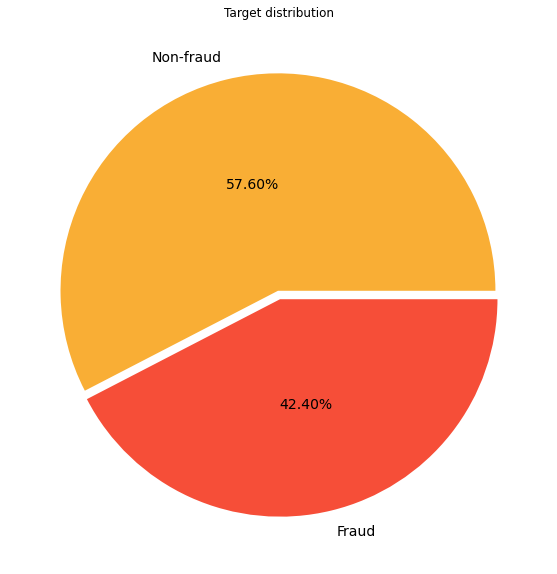

In [12]:
# Inspect target distribution
print(df['flag'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['flag'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

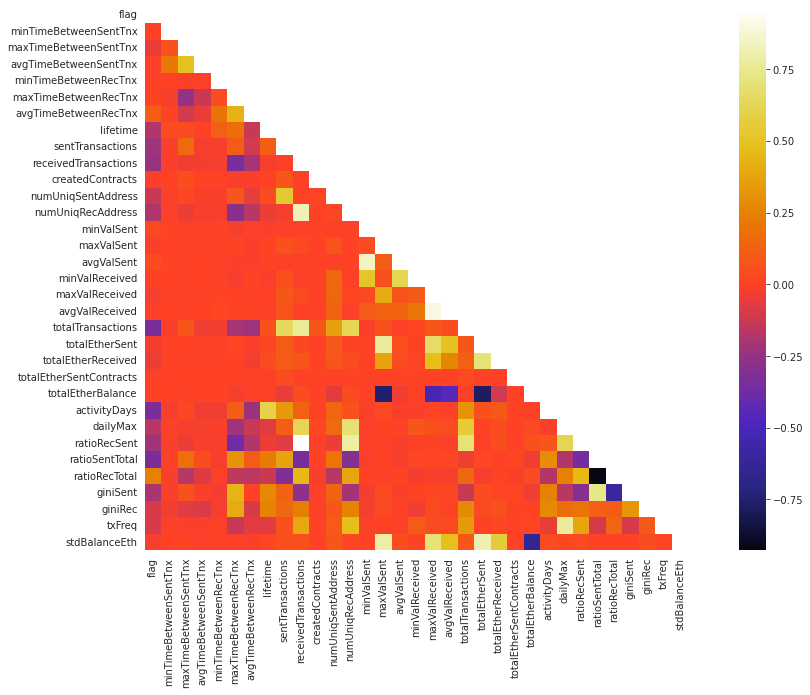

In [13]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data cleaning</p>

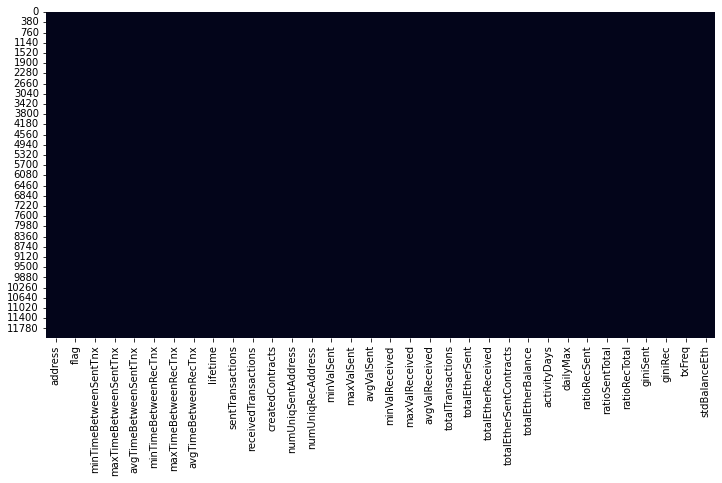

In [14]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [15]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [16]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(12146, 33)


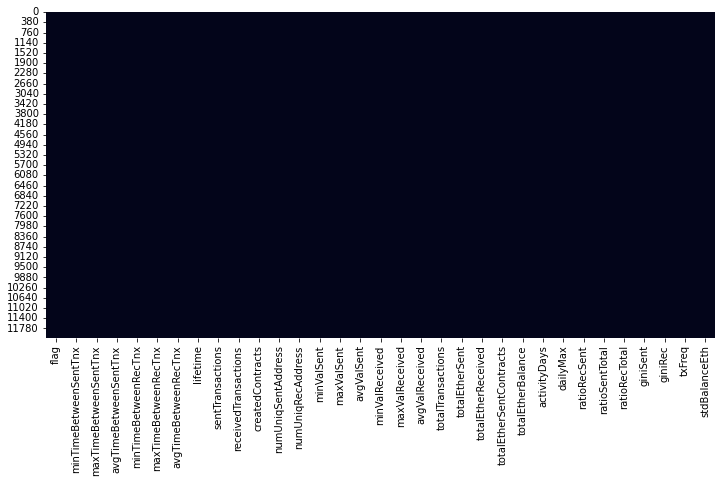

In [17]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [18]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

Series([], dtype: float64)


flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDay

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  minValSent               12146 non-null  float64
 14  maxValSent            

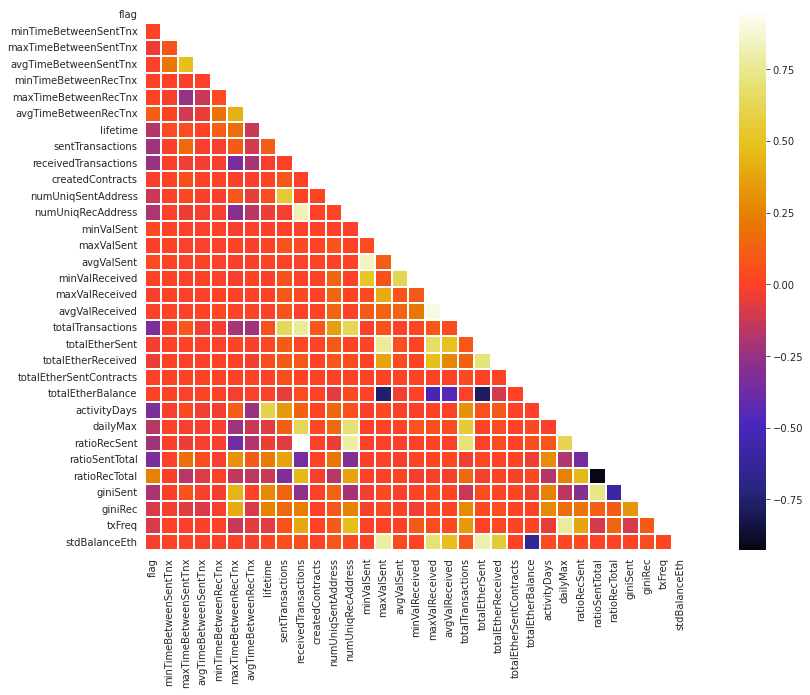

In [20]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [21]:
df.columns

Index(['flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx',
       'avgTimeBetweenRecTnx', 'lifetime', 'sentTransactions',
       'receivedTransactions', 'createdContracts', 'numUniqSentAddress',
       'numUniqRecAddress', 'minValSent', 'maxValSent', 'avgValSent',
       'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'],
      dtype='object')

In [22]:
col_list = list(df.columns)
col_list

['flag',
 'minTimeBetweenSentTnx',
 'maxTimeBetweenSentTnx',
 'avgTimeBetweenSentTnx',
 'minTimeBetweenRecTnx',
 'maxTimeBetweenRecTnx',
 'avgTimeBetweenRecTnx',
 'lifetime',
 'sentTransactions',
 'receivedTransactions',
 'createdContracts',
 'numUniqSentAddress',
 'numUniqRecAddress',
 'minValSent',
 'maxValSent',
 'avgValSent',
 'minValReceived',
 'maxValReceived',
 'avgValReceived',
 'totalTransactions',
 'totalEtherSent',
 'totalEtherReceived',
 'totalEtherSentContracts',
 'totalEtherBalance',
 'activityDays',
 'dailyMax',
 'ratioRecSent',
 'ratioSentTotal',
 'ratioRecTotal',
 'giniSent',
 'giniRec',
 'txFreq',
 'stdBalanceEth']

Drop one of those highly correlated features
    

In [23]:
drop = ['totalEtherSentContracts', 'maxValSent', 'avgValReceived',
        'avgValReceived', 'maxValReceived', 'minValReceived', 'numUniqRecAddress', 'maxValSent', 'avgValSent',
        'minValSent', 'maxValSent', 'totalTransactions', 'avgValSent', 'numUniqSentAddress',
        'numUniqRecAddress', 'totalEtherReceived', 'minValReceived', 'minValSent', 'numUniqRecAddress']
# df.drop(drop, axis=1, inplace=True)

In [24]:
new_col_list = list(set(col_list).difference(set(drop)))
df = df[new_col_list]
df

,createdContracts,sentTransactions,giniRec,dailyMax,ratioSentTotal,txFreq,totalEtherSent,giniSent,minTimeBetweenSentTnx,flag,...,ratioRecTotal,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,totalEtherBalance,ratioRecSent,stdBalanceEth,avgTimeBetweenSentTnx,receivedTransactions,lifetime,activityDays
0,0,66,0.888782,60,0.750000,1.891304,366.921190,0.969121,0.0,1,...,0.238636,89.0,1.501076e+09,0.291940,0.313433,147.701484,5.807655e+04,21,46,10
1,0,0,0.238480,1,0.000000,0.057143,0.000000,0.000000,0.0,1,...,0.666667,3021091.0,1.502802e+09,0.013541,2.000000,0.005000,0.000000e+00,2,35,2
2,0,15,0.614205,16,0.394737,0.123746,199.950000,0.465450,37.0,1,...,0.578947,0.0,1.500397e+09,0.266494,1.375000,52.129575,1.710279e+06,22,299,14
3,0,109,0.794121,67,0.493213,6.111111,1630.570000,0.957906,0.0,1,...,0.502262,0.0,1.500037e+09,0.007419,1.009091,233.689231,1.576106e+04,111,36,36
4,0,1,0.406556,3,0.166667,0.060976,1.900000,0.000000,0.0,1,...,0.666667,3894.0,1.500402e+09,0.002199,2.000000,0.757788,0.000000e+00,4,82,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,0,14,0.615051,4,0.500000,1.080000,3.094515,0.643490,3.0,0,...,0.464286,698.0,1.656129e+09,0.009248,0.866667,0.236468,1.186571e+03,13,25,24
12142,0,119,0.289923,3,0.850000,0.932886,16.220988,0.856372,0.0,0,...,0.142857,0.0,1.648939e+09,-1.600064,0.166667,0.617016,2.206761e+04,20,149,136
12143,1,0,0.000000,296,0.000000,11.020833,0.000000,0.000000,0.0,0,...,0.996226,0.0,4.086570e+05,0.000000,528.000000,0.000000,0.000000e+00,528,48,41
12144,0,59,0.571522,6,0.776316,0.480769,1.972436,0.907248,0.0,0,...,0.210526,223.0,1.647548e+09,-0.364932,0.266667,0.161996,1.412816e+05,16,156,69


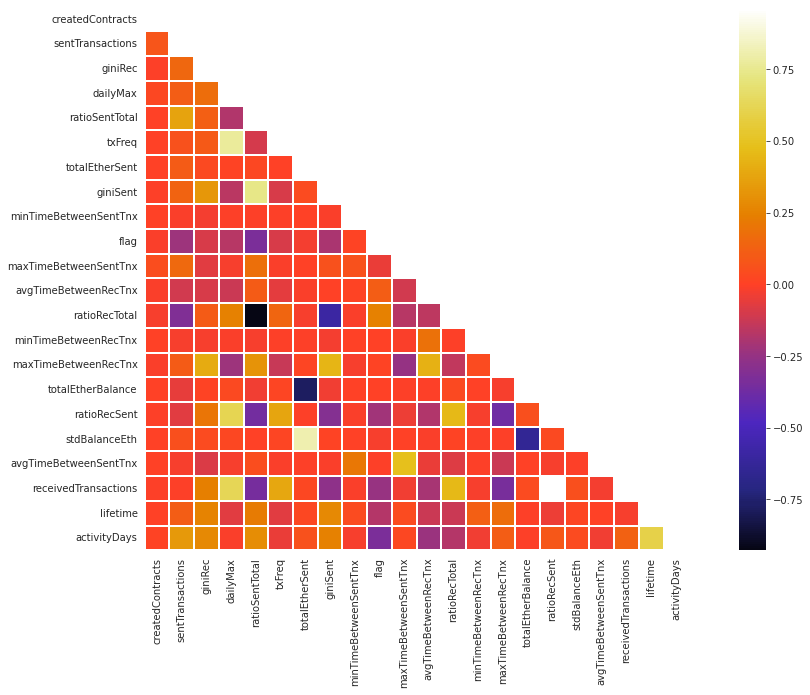

In [25]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [26]:
columns = df.columns
columns

Index(['createdContracts', 'sentTransactions', 'giniRec', 'dailyMax',
       'ratioSentTotal', 'txFreq', 'totalEtherSent', 'giniSent',
       'minTimeBetweenSentTnx', 'flag', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenRecTnx', 'ratioRecTotal', 'minTimeBetweenRecTnx',
       'maxTimeBetweenRecTnx', 'totalEtherBalance', 'ratioRecSent',
       'stdBalanceEth', 'avgTimeBetweenSentTnx', 'receivedTransactions',
       'lifetime', 'activityDays'],
      dtype='object')

In [27]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column flag has the following distribution: 
0    6996
1    5150
Name: flag, dtype: int64


In [28]:
drops = ['minValSent', 'numUniqSentAddress']

In [29]:
new_col_list = list(set(columns).difference(set(drops)))
df = df[new_col_list]
df

,ratioRecTotal,createdContracts,minTimeBetweenRecTnx,sentTransactions,giniRec,dailyMax,ratioSentTotal,maxTimeBetweenRecTnx,totalEtherBalance,ratioRecSent,...,giniSent,minTimeBetweenSentTnx,stdBalanceEth,flag,avgTimeBetweenSentTnx,maxTimeBetweenSentTnx,receivedTransactions,lifetime,activityDays,avgTimeBetweenRecTnx
0,0.238636,0,89.0,66,0.888782,60,0.750000,1.501076e+09,0.291940,0.313433,...,0.969121,0.0,147.701484,1,5.807655e+04,2387389.0,21,46,10,7.148260e+07
1,0.666667,0,3021091.0,0,0.238480,1,0.000000,1.502802e+09,0.013541,2.000000,...,0.000000,0.0,0.005000,1,0.000000e+00,0.0,2,35,2,7.529115e+08
2,0.578947,0,0.0,15,0.614205,16,0.394737,1.500397e+09,0.266494,1.375000,...,0.465450,37.0,52.129575,1,1.710279e+06,25112882.0,22,299,14,6.820612e+07
3,0.502262,0,0.0,109,0.794121,67,0.493213,1.500037e+09,0.007419,1.009091,...,0.957906,0.0,233.689231,1,1.576106e+04,642460.0,111,36,36,1.352571e+07
4,0.666667,0,3894.0,1,0.406556,3,0.166667,1.500402e+09,0.002199,2.000000,...,0.000000,0.0,0.757788,1,0.000000e+00,0.0,4,82,3,3.751409e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,0.464286,0,698.0,14,0.615051,4,0.500000,1.656129e+09,0.009248,0.866667,...,0.643490,3.0,0.236468,0,1.186571e+03,15139.0,13,25,24,1.275572e+08
12142,0.142857,0,0.0,119,0.289923,3,0.850000,1.648939e+09,-1.600064,0.166667,...,0.856372,0.0,0.617016,0,2.206761e+04,411419.0,20,149,136,8.295712e+07
12143,0.996226,1,0.0,0,0.000000,296,0.000000,4.086570e+05,0.000000,528.000000,...,0.000000,0.0,0.000000,0,0.000000e+00,0.0,528,48,41,7.712044e+03
12144,0.210526,0,223.0,59,0.571522,6,0.776316,1.647548e+09,-0.364932,0.266667,...,0.907248,0.0,0.161996,0,1.412816e+05,2003867.0,16,156,69,1.033063e+08


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [30]:
# df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(12146, 22)


,ratioRecTotal,createdContracts,minTimeBetweenRecTnx,sentTransactions,giniRec,dailyMax,ratioSentTotal,maxTimeBetweenRecTnx,totalEtherBalance,ratioRecSent,...,giniSent,minTimeBetweenSentTnx,stdBalanceEth,flag,avgTimeBetweenSentTnx,maxTimeBetweenSentTnx,receivedTransactions,lifetime,activityDays,avgTimeBetweenRecTnx
0,0.238636,0,89.0,66,0.888782,60,0.750000,1.501076e+09,0.291940,0.313433,...,0.969121,0.0,147.701484,1,5.807655e+04,2387389.0,21,46,10,7.148260e+07
1,0.666667,0,3021091.0,0,0.238480,1,0.000000,1.502802e+09,0.013541,2.000000,...,0.000000,0.0,0.005000,1,0.000000e+00,0.0,2,35,2,7.529115e+08
2,0.578947,0,0.0,15,0.614205,16,0.394737,1.500397e+09,0.266494,1.375000,...,0.465450,37.0,52.129575,1,1.710279e+06,25112882.0,22,299,14,6.820612e+07
3,0.502262,0,0.0,109,0.794121,67,0.493213,1.500037e+09,0.007419,1.009091,...,0.957906,0.0,233.689231,1,1.576106e+04,642460.0,111,36,36,1.352571e+07
4,0.666667,0,3894.0,1,0.406556,3,0.166667,1.500402e+09,0.002199,2.000000,...,0.000000,0.0,0.757788,1,0.000000e+00,0.0,4,82,3,3.751409e+08


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data preparation</p>

In [31]:
ordered_list = ['flag', 'dailyMax', 'lifetime', 'ratioRecSent', 'activityDays', 'giniSent',
       'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal']
df = df[ordered_list]
df

,flag,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
0,1,60,46,0.313433,10,0.969121,1.501076e+09,0,147.701484,0.238636,...,21,2387389.0,0.291940,89.0,1.891304,5.807655e+04,0.0,0.888782,366.921190,0.750000
1,1,1,35,2.000000,2,0.000000,1.502802e+09,0,0.005000,0.666667,...,2,0.0,0.013541,3021091.0,0.057143,0.000000e+00,0.0,0.238480,0.000000,0.000000
2,1,16,299,1.375000,14,0.465450,1.500397e+09,0,52.129575,0.578947,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.950000,0.394737
3,1,67,36,1.009091,36,0.957906,1.500037e+09,0,233.689231,0.502262,...,111,642460.0,0.007419,0.0,6.111111,1.576106e+04,0.0,0.794121,1630.570000,0.493213
4,1,3,82,2.000000,3,0.000000,1.500402e+09,0,0.757788,0.666667,...,4,0.0,0.002199,3894.0,0.060976,0.000000e+00,0.0,0.406556,1.900000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,0,4,25,0.866667,24,0.643490,1.656129e+09,0,0.236468,0.464286,...,13,15139.0,0.009248,698.0,1.080000,1.186571e+03,3.0,0.615051,3.094515,0.500000
12142,0,3,149,0.166667,136,0.856372,1.648939e+09,0,0.617016,0.142857,...,20,411419.0,-1.600064,0.0,0.932886,2.206761e+04,0.0,0.289923,16.220988,0.850000
12143,0,296,48,528.000000,41,0.000000,4.086570e+05,1,0.000000,0.996226,...,528,0.0,0.000000,0.0,11.020833,0.000000e+00,0.0,0.000000,0.000000,0.000000
12144,0,6,156,0.266667,69,0.907248,1.647548e+09,0,0.161996,0.210526,...,16,2003867.0,-0.364932,223.0,0.480769,1.412816e+05,0.0,0.571522,1.972436,0.776316


In [32]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(12146, 21) (12146,)


In [33]:
df.columns

Index(['flag', 'dailyMax', 'lifetime', 'ratioRecSent', 'activityDays',
       'giniSent', 'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal'],
      dtype='object')

In [34]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9716, 21) (9716,)
(2430, 21) (2430,)


In [35]:
# input address
# address = "XXXXDDDFFFF"
# find the data for the address in the test set.
# run the models on that data
# output probabilities

In [36]:
#df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
df_orig = pd.read_csv('../input/ethereum-fraud-dataset/eth_illicit_features.csv')
print(df_orig.shape)
df_orig.head()

(12146, 34)


,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [37]:
df_orig.columns

Index(['address', 'flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx',
       'avgTimeBetweenRecTnx', 'lifetime', 'sentTransactions',
       'receivedTransactions', 'createdContracts', 'numUniqSentAddress',
       'numUniqRecAddress', 'minValSent', 'maxValSent', 'avgValSent',
       'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'],
      dtype='object')

In [38]:
df_input = df_orig[df_orig['address'] == "0x00e01a648ff41346cdeb873182383333d2184dd1"]
df_input

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375,0.394737,0.578947,0.46545,0.614205,0.123746,52.129575


In [39]:
# we keep the columns we want for prediction

df_input = df_input[['dailyMax', 'lifetime', 'ratioRecSent', 'activityDays',
       'giniSent', 'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal']]
df_input

,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,avgTimeBetweenRecTnx,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
2,16,299,1.375,14,0.46545,1.500397e+09,0,52.129575,0.578947,6.820612e+07,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.95,0.394737


In [40]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [41]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,avgTimeBetweenRecTnx,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
0,0.297432,2.160839,1.915753,2.102988,0.708963,0.572549,-0.405499,1.674452,1.510511,-0.741986,...,1.793187,1.097932,-0.009335,0.412883,0.277631,0.904111,-0.817848,-1.152751,1.739623,-1.400729
1,-0.336660,-0.381196,0.100292,-0.758195,0.484675,0.566594,-0.405499,1.873259,0.453906,0.900307,...,-0.489419,0.762364,-0.011463,0.794114,-0.882730,1.126796,1.150455,0.806252,1.819654,-0.315793
2,-0.336660,1.337603,-0.680969,1.239925,1.057256,0.609475,-0.405499,0.840766,-0.608680,0.203034,...,0.650023,0.740164,-0.009959,0.194159,-0.840542,0.740420,-0.817848,0.341619,0.888912,0.909740
3,-0.861714,-0.964949,-0.049369,-1.121982,-1.177094,0.598221,-0.405499,1.190310,0.290078,1.301242,...,-1.023771,-1.314021,-0.009696,0.932409,-0.720485,-1.306155,-0.817848,0.225598,0.958695,-0.580445
4,1.603492,0.575409,2.102999,1.188740,-1.177094,0.617864,-0.405499,1.935166,1.530713,-0.873750,...,1.909159,-1.314021,0.111916,-1.080743,1.750427,-1.306155,-0.817848,1.526459,-1.149277,-1.435799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,-1.357674,-1.378651,0.423767,-1.121982,-1.177094,0.623436,-0.405499,-1.102069,0.759046,1.323984,...,-1.023771,-1.314021,-0.009696,1.607711,-0.224645,-1.306155,-0.817848,-1.389193,-1.149277,-1.435799
9712,1.800476,0.248533,2.102998,0.924714,-1.177094,-1.453444,2.465309,-1.101349,1.530508,-1.381722,...,1.909148,-1.314021,-0.009696,-1.080743,1.839718,-1.306155,-0.817848,1.435498,-1.149277,-1.435799
9713,-0.172669,-0.010701,1.276240,0.325431,0.661749,0.588090,-0.405499,1.184185,1.307122,0.272432,...,0.520234,0.813446,-0.009696,0.439881,-0.496968,1.152787,1.283331,1.120224,1.055290,-1.154584
9714,0.573993,0.032908,0.340425,0.634364,0.060767,0.621860,-0.405499,-0.790718,0.686331,-0.006561,...,0.949214,0.271242,-0.009695,0.134630,0.421005,0.196363,1.028518,-0.027238,0.775402,-0.250188


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Handling the imbalance</p>
Oversampling using SMOTE

In [42]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((9716, 21), (9716,))
Shape of the training after SMOTE: ((11192, 21), (11192,))


In [43]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1

print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 5596 
 	Fauds: 4120
AFTER OVERSAMPLING 
 	Non-frauds: 5596 
 	Fauds: 5597


In [44]:
zeroCounter = 0
oneCounter = 0

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Modeling</p>

**Logistic Regression**

In [45]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)
preds = LR.predict(df_input)
pred_prob = LR.predict_proba(df_input)
print(preds)
print(pred_prob)

if (preds == 0):
    zeroCounter += 1
else:
    oneCounter += 1

[1]
[[0. 1.]]


**Random Forest Classifier**

In [46]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds = RF.predict(df_input)
pred_prob = RF.predict_proba(df_input)
print(preds)
print(pred_prob)

if (preds == 0):
    zeroCounter += 1
else:
    oneCounter += 1

[0]
[[0.68 0.32]]


**XGB Classifier**

In [47]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds = xgb_c.predict(df_input)
pred_prob = xgb_c.predict_proba(df_input)
print(preds)
print(pred_prob)

if (preds == 0):
    zeroCounter += 1
else:
    oneCounter += 1

[0]
[[9.9997973e-01 2.0266085e-05]]


# SVM Classifier

In [48]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001, C=100., kernel = 'linear', probability=True)
svc.fit(x_tr_resample, y_tr_resample)
preds = svc.predict(df_input)
pred_prob = svc.predict_proba(df_input)
print(preds)
print(pred_prob)

if (preds == 0):
    zeroCounter += 1
else:
    oneCounter += 1

[1]
[[3.0000009e-14 1.0000000e+00]]


# K-Nearest Neighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr_resample, y_tr_resample)
preds = knn.predict(df_input)
pred_prob = knn.predict_proba(df_input)
print(preds)
print(pred_prob)

if (preds == 0):
    zeroCounter += 1
else:
    oneCounter += 1

[0]
[[1. 0.]]


In [50]:
# voting models

maxVote = max(zeroCounter, oneCounter)

if (maxVote == zeroCounter):
    print("Based on voting different models, it is concluded that this transaction is not fraud")
else:
    print("Based on voting different models, it is concluded that this transaction is fraud")

Based on voting different models, it is concluded that this transaction is not fraud
